**General expression of a second order linear ODE**
$$y''+P(x)*y'+Q(x)*y=R(x)$$

the below therom is applicable for **homogenous eqautions** only,but not for non homgenous or nonlinear.

$$y=c1*y1+c2*y2$$
$$y''+P(x)*y'+Q(x)*y=(c1*y1+c2*y2)''+P(x)*(c1*y1+c2*y2)+Q(x)*(c1*y1+c2*y2)$$
$$y''+P(x)*y'+Q(x)*y=(y1''+P(x)*y1'+Q(x)*y1)*c1 + (y2''+P(x)*y2'+Q(x)*y2)*c2$$
$$(y1''+P(x)*y1'+Q(x)*y1)*c1 + (y2''+P(x)*y2'+Q(x)*y2)*c2=0$$

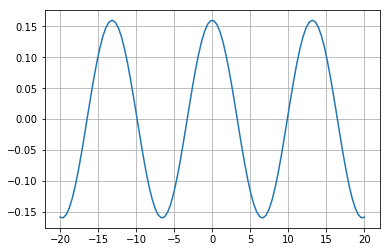

In [5]:
import numpy as np
import matplotlib.pyplot as plt
m=10
y=1.09
k=90
#force given gravity,where m is mass of the body
g=9.8
F=m*g
#distance moved by spring by gravity where k is the spring constant and y is distance moved due to gravity
F1=-k*y

#by newton laws F1+F=0 
#m*g+k*y=0
#m*y''+k*y=0
#got stuck with a second differential order eq......no probs lets solve it
##since assuming the body moves from rest y'=0 makes B=0 and y(0)=A=0.16
##undamped Oscillations
B=0
A=0.16
w=(np.sqrt(k/m))/(2*np.pi)
t=np.linspace(-20,20,100)
y=A*np.cos(w*t)+B*np.sin(w*t)
#or
## tan(d)=B/A and C=sqrt(A^2+B^2) y=C*np.cos(wt-d)
plt.plot(t,y)
plt.grid(True)
plt.show()




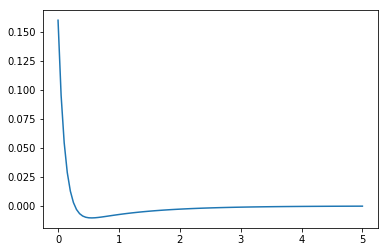

In [20]:
#imagine as damper is now connected with a damping force F2=-c*y'
#c is damping constant
#if the mass attached moves down  y'>0 and c>0  which makes F2 as negative.
#if the mass attached moves up y'<0 and c>0 which makes F2 as positive.
# my''+cy'ky+=0 a second order ODE
#divide by m we get y''+(c/m)y'+(k/m)y=0
#roots of quadratic eqaution are y1=-a+b and y2=-a-b where a=(c/2*m) and b=(1/2*m)*(sqrt(c^2-4*m*k))
#depend on the values of roots the damping of roots is of 3 types
#1.overdamping -- c^2-4*m*k>0 Genreal solutuion is y=c1*exp((-a+b)*t)+c2*exp((-a-b)*t)
#damping takes out energy so quickly that the body does not oscillate.
import numpy as np
import matplotlib.pyplot as plt
m=10
k=90
c=100
a=(c*0.5)/m
b=(0.5)*(np.sqrt((c*c)-(4*m*k)))/m
t=np.linspace(0,5,100)
#y(0)=0.16 and y'(0)=0 from general solution y=c1*exp((-a+b)*t)+c2*exp((-a-b)*t)
# we get equations c1+c2=0.16 and -9*c1-c2=0
#we get c1=-0.02 and c2=0.18
c1=-0.02
c2=0.18
y=c1*np.exp((-a+b)*t)+c2*np.exp((-a-b)*t)
plt.plot(t,y)
plt.show()

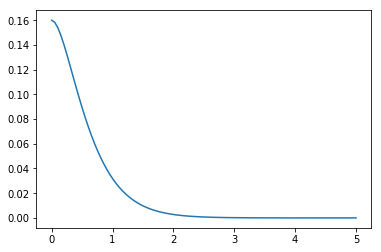

In [19]:
#2.critical  damping occurs when c^2=4*m*k
#then b=0 and y1=y2=-a so the genral solution is y=(c1+c2*t)*exp(-a*t)
import matplotlib.pyplot as plt
import numpy as np
c=60
m=10
k=90
a=(c*0.5)/m
b=(0.5)*(np.sqrt((c*c)-(4*m*k)))/m
#from initial conditions y(0)=0.16 and y'(0)=0
#we get equations c1=0.16 and c2-3*c1=0 solving eqations we get c1 and c2
c1=0.16
c2=0.48
t=np.linspace(0,5,100)
y=(c1+c2*t)*np.exp(-a*t)
plt.plot(t,y)
plt.show()


0.5 0.16 2.9949958263743874 -0.02702702702702703


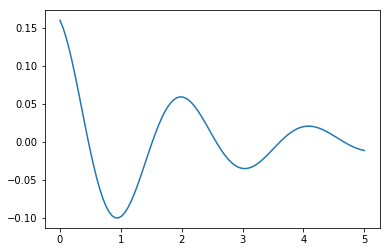

In [31]:
#underdamping occurs when c^2-4*m*k<0
#b=(1/2*m)*(sqrt(c^2-4*m*k))
#since by above conditions we get negative square roots that lead to imaginary roots
#b=i*w where w=(1/2*m)*(sqrt(4*m*k-c^2))
#this leads to roots as y1=-a+i*w and y2=-a-i*w
#this gives the differential eqaution y(t)=exp(-a*t)*((A*cos(w*t))+(B*sin(w*t)))
import matplotlib.pyplot as plt
import numpy as np
c=10
m=10
k=90
a=(c*0.5)/m
w=(1/(2*m))*(np.sqrt(4*m*k-c^2))
#using initial conditions we get A=0.16 and -0.5*A+2.96*B=0
A=0.16
B=(-0.5*A)/2.96
t=np.linspace(0,5,100)
print(a,A,w,B)
y=np.exp(-a*t)*((A*np.cos(w*t))+(B*np.sin(w*t)))
plt.plot(t,y)
plt.show()

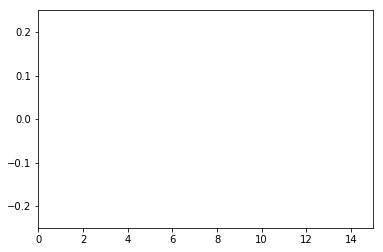

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from math import *

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(0, 15)
    ax.set_ylim(-0.25, 0.25)
    return ln,

def update(frame):
    
    c=10
    m=10
    k=90
    a=(c*0.5)/m
    w=(1/(2*m))*(np.sqrt(4*m*k-c^2))
    #using initial conditions we get A=0.16 and -0.5*A+2.96*B=0
    A=0.16
    B=(-0.5*A)/2.96
    t=frame
    
    y=np.exp(-a*t)*((A*np.cos(w*t))+(B*np.sin(w*t)))
    print(t,y)
    x1=frame
    y1=y
    xdata.append(x1)
    ydata.append(y1)
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 15, 200),
                    init_func=init, blit=True)
plt.show()
